In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
data = pd.read_csv('Dataset.csv')
X = data.iloc[:,1:41]
y = data.iloc[:,-1]

In [3]:
data.head()

,Unnamed: 0,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,...,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99,y
0,0,5099,1,5,156,35,-2,1,40,999,...,0.11,629,14,487,-0.31,115,0.02,-0.10,-0.49,0
1,1,5191,0,1,164,16,1,5,4,999,...,0.11,509,26,346,-0.31,317,0.02,0.24,-0.21,0
2,2,5228,1,0,774,75,1,5,12,999,...,0.11,1058,30,227,-0.31,464,0.02,-0.10,-0.21,0
3,3,5228,1,1,747,4,1,5,69,999,...,0.11,1048,4,17,-0.31,39,-0.18,-0.10,-0.21,0
4,4,5196,1,5,29,28,0,4,32,999,...,0.11,993,22,58,-0.31,492,0.02,-0.10,0.21,0


In [4]:
X.head()

,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,x_2,...,x_71,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99
0,5099,1,5,156,35,-2,1,40,999,7,...,1,0.11,629,14,487,-0.31,115,0.02,-0.10,-0.49
1,5191,0,1,164,16,1,5,4,999,5,...,0,0.11,509,26,346,-0.31,317,0.02,0.24,-0.21
2,5228,1,0,774,75,1,5,12,999,4,...,0,0.11,1058,30,227,-0.31,464,0.02,-0.10,-0.21
3,5228,1,1,747,4,1,5,69,999,3,...,1,0.11,1048,4,17,-0.31,39,-0.18,-0.10,-0.21
4,5196,1,5,29,28,0,4,32,999,6,...,0,0.11,993,22,58,-0.31,492,0.02,-0.10,0.21


In [5]:
# Method 1: Chi-squared Feature Selection

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X=X_scaled_df

In [6]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [7]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [8]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [9]:
print(featureScores.nlargest(20,'Score'))

    Specs       Score
35   x_80  273.106496
6   x_144   99.167328
23   x_60   69.202233
21   x_57   65.642238
5   x_127   62.528209
0     x_1   50.844164
34    x_8   50.032196
18   x_45   27.695429
8    x_18   17.426818
39   x_99    9.872584
31   x_73    4.689793
15   x_38    3.913320
38   x_91    3.771053
30   x_71    3.604474
19   x_52    3.008621
25   x_64    2.201684
11   x_27    1.416300
14   x_33    1.221038
10   x_25    1.031407
12   x_28    0.861135


In [10]:
top_20_features = featureScores.nlargest(20, 'Score')
selected_features_array = top_20_features['Specs'].to_numpy()
print(selected_features_array)

['x_80' 'x_144' 'x_60' 'x_57' 'x_127' 'x_1' 'x_8' 'x_45' 'x_18' 'x_99'
 'x_73' 'x_38' 'x_91' 'x_71' 'x_52' 'x_64' 'x_27' 'x_33' 'x_25' 'x_28']


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_temp=X[selected_features_array]
X_train_t,X_test, y_train,y_test=train_test_split(X_temp,y, random_state=56, test_size=0.2)

model_chi = LogisticRegression()
model_chi.fit(X_train_t, y_train)
y_pred = model_chi.predict(X_test)
accuracy_chi = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_chi)

Accuracy: 0.912621359223301


In [12]:
# Method 2:Extra Trees Classifier Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model_extratrees = ExtraTreesClassifier()
X_train,X_test, y_train,y_test=train_test_split(X,y, random_state=56, test_size=0.2)
model_extratrees.fit(X_train,y_train)

ExtraTreesClassifier()

In [13]:
print(model_extratrees.feature_importances_)

[0.05767926 0.01431527 0.02110076 0.02163571 0.02253494 0.03439921
 0.02883774 0.02221716 0.03976212 0.02256106 0.02343915 0.01614784
 0.02790288 0.01456509 0.02374516 0.0207378  0.02347815 0.02297975
 0.0116525  0.0186715  0.01525467 0.03657804 0.02210619 0.01227502
 0.01904447 0.01585352 0.01486162 0.01934448 0.02151509 0.02129521
 0.01451957 0.00791509 0.02220889 0.02224489 0.1277638  0.03943906
 0.0228151  0.01267375 0.01815281 0.02577571]


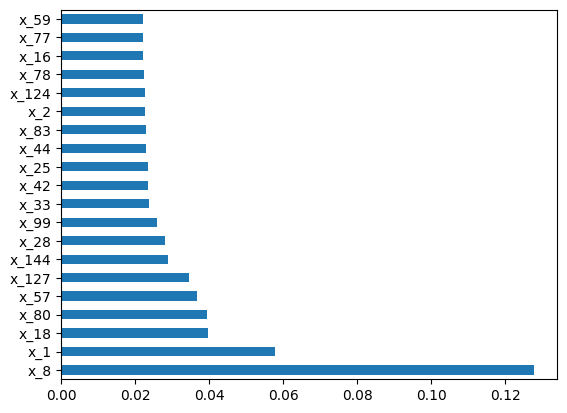

In [14]:
feat_importances = pd.Series(model_extratrees.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [15]:
y_pred=model_extratrees.predict(X_test)
accuracy_extratrees=accuracy_score(y_pred,y_test)
print("Accuracy: ",accuracy_extratrees)

Accuracy:  0.9114077669902912


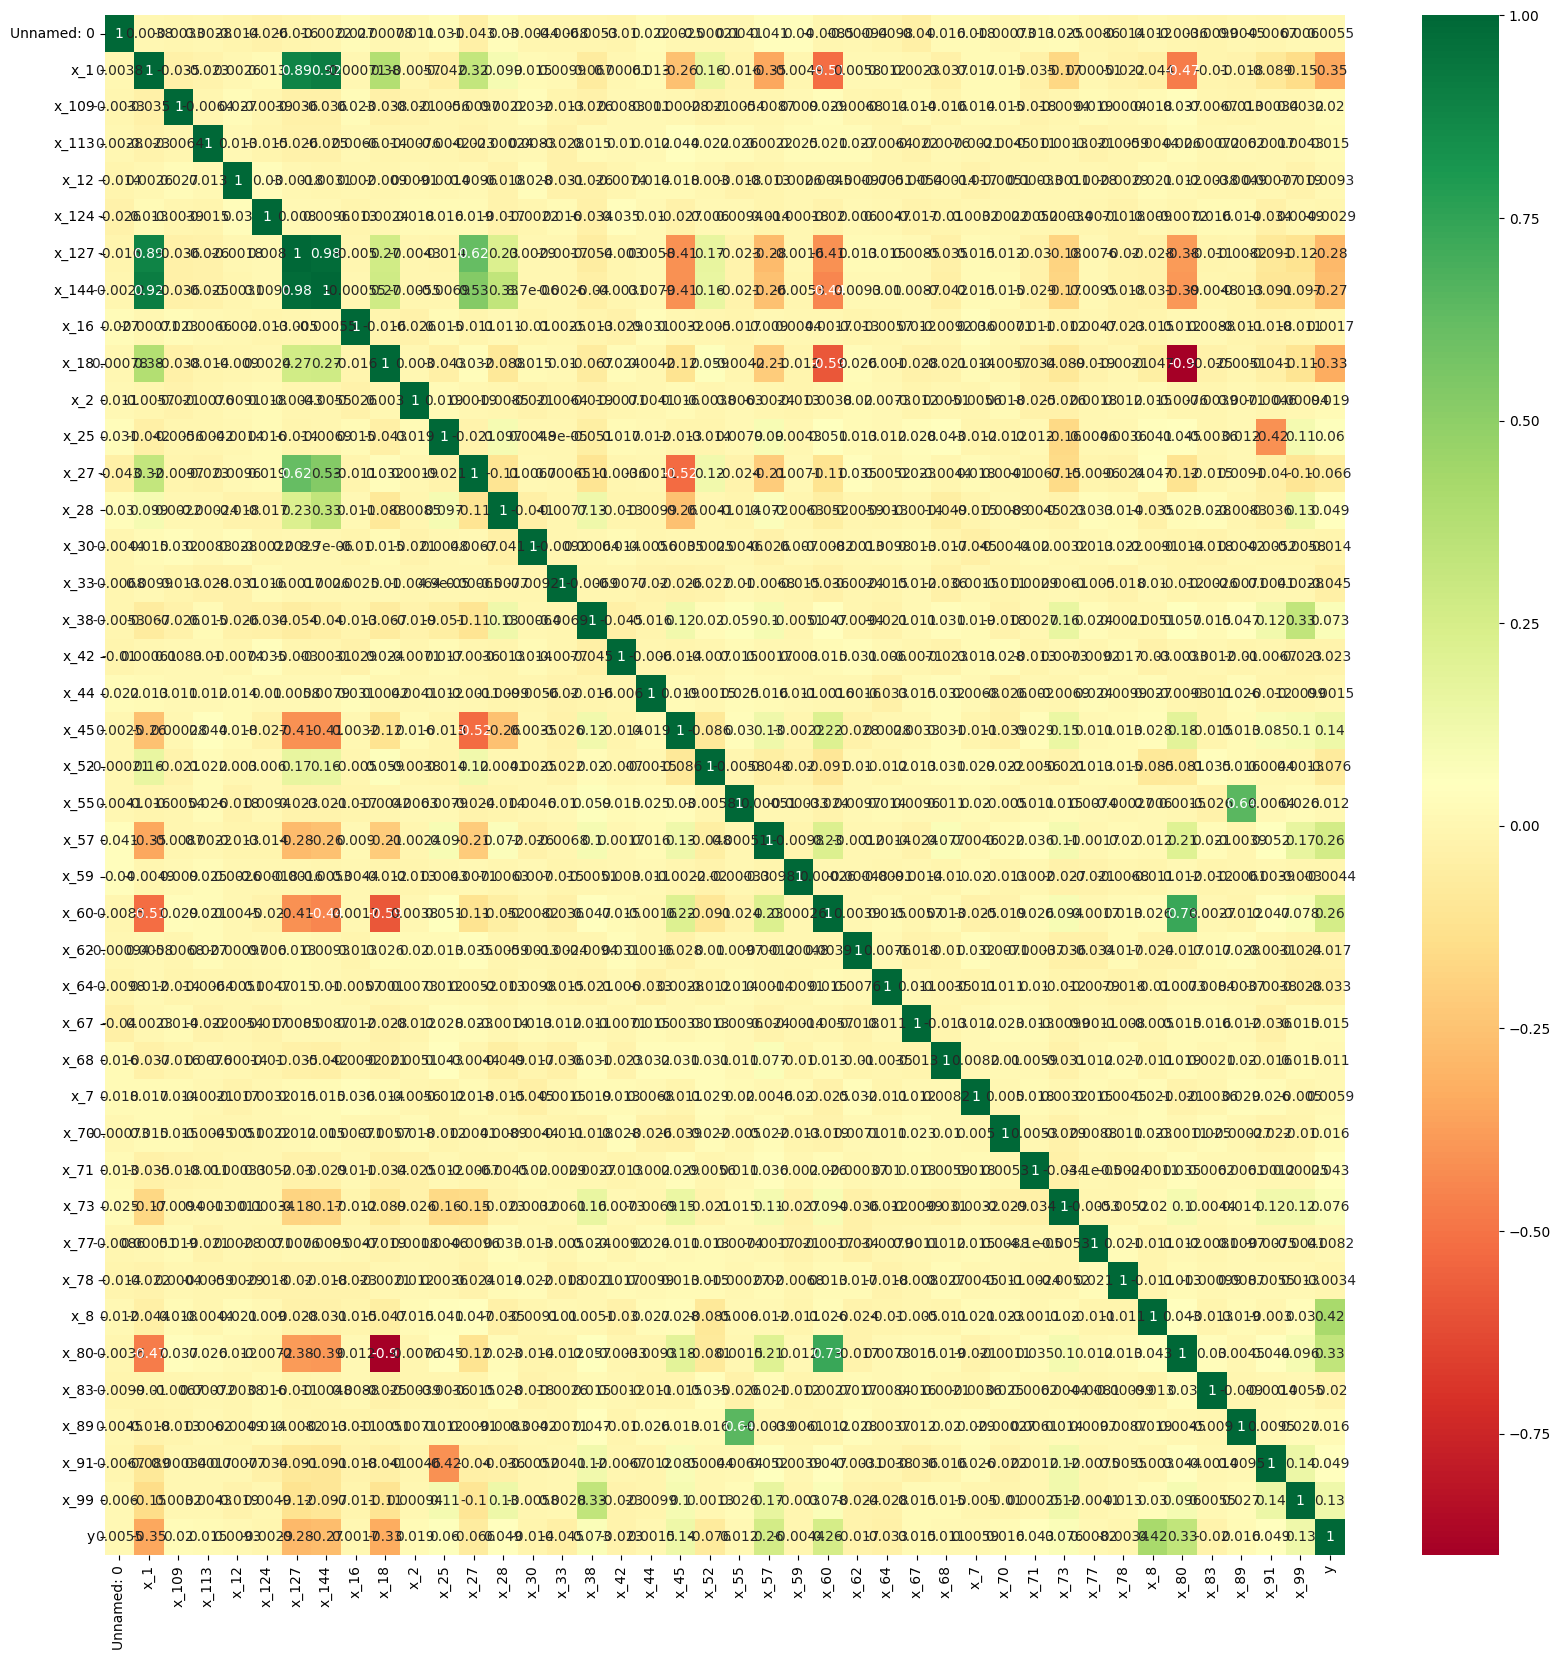

In [16]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
# Method 3:Random Forest Classifier Feature Importance

from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_estimators=100, random_state=56)

In [19]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=56)

In [20]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

In [21]:
num_features = 20
top_indices = indices[:num_features]
top_importances = importances[top_indices]
print("Top 10 feature rankings:")
for f in range(num_features):
    print(f"{f+1}. {X_train.columns[indices[f]]}: {importances[indices[f]]}")

Top 10 feature rankings:
1. x_8: 0.20585874862833906
2. x_1: 0.08588025642497289
3. x_33: 0.033254760046470405
4. x_28: 0.03307636457366592
5. x_44: 0.03306441913459819
6. x_57: 0.03302391136709179
7. x_77: 0.03236003114325296
8. x_83: 0.03164027208437661
9. x_12: 0.03093987171303626
10. x_25: 0.030662390161282634
11. x_70: 0.030162896899455855
12. x_59: 0.028659078894012206
13. x_7: 0.028431902499447458
14. x_124: 0.027739311318828203
15. x_80: 0.02754413562433928
16. x_16: 0.02662348118488306
17. x_18: 0.02611373372359568
18. x_78: 0.024466167288135266
19. x_42: 0.02430328322364134
20. x_127: 0.022316483275432775


In [22]:
rfc_selected_features = np.zeros(20, dtype=object)
for f in range(num_features):
    rfc_selected_features[f]=X_train.columns[indices[f]]
print(rfc_selected_features)

['x_8' 'x_1' 'x_33' 'x_28' 'x_44' 'x_57' 'x_77' 'x_83' 'x_12' 'x_25'
 'x_70' 'x_59' 'x_7' 'x_124' 'x_80' 'x_16' 'x_18' 'x_78' 'x_42' 'x_127']


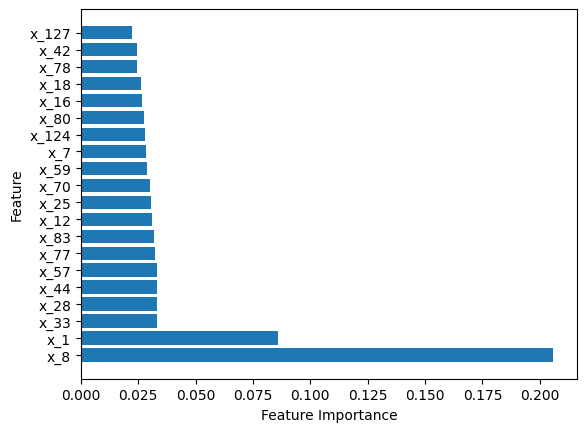

In [23]:
plt.barh(range(num_features), top_importances, align="center")
plt.yticks(range(num_features), X_train.columns[top_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [24]:
y_pred=rfc.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_rfc = accuracy_score(y_test, y_pred)


print("Accuracy:", accuracy_rfc)

Accuracy: 0.9174757281553398


In [25]:
# Method 4: Forward Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression()

In [26]:
sfs = SFS(model_logreg, k_features=20, forward=True, floating=False, scoring="accuracy", cv=5)


In [27]:
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(20, 20),
                          scoring='accuracy')

In [28]:
sf_array=np.array(sfs.k_feature_names_)
print("Selected Features:",sf_array)

Selected Features: ['x_1' 'x_109' 'x_113' 'x_124' 'x_16' 'x_2' 'x_25' 'x_27' 'x_44' 'x_52'
 'x_60' 'x_64' 'x_67' 'x_68' 'x_7' 'x_70' 'x_73' 'x_8' 'x_80' 'x_89']


In [29]:
# Evaluate the performance of the selected features on the testing set
accuracy_sfs = sfs.k_score_
print("Accuracy:", accuracy_sfs)

Accuracy: 0.910773899848255


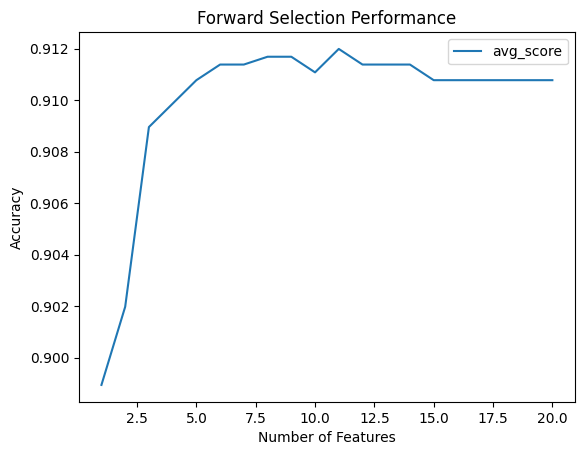

In [30]:
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

In [31]:
!git clone https://github.com/jundongl/scikit-feature.git
%cd scikit-feature
!pip install .

Cloning into 'scikit-feature'...
remote: Enumerating objects: 1089, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 1089 (delta 57), reused 132 (delta 57), pack-reused 957
Receiving objects: 100% (1089/1089), 194.81 MiB | 48.26 MiB/s, done.
Resolving deltas: 100% (643/643), done.
/content/scikit-feature
Processing /content/scikit-feature
  Preparing metadata (setup.py) ... done
  Created wheel for skfeature: filename=skfeature-1.0.0-py3-none-any.whl size=61488 sha256=7ab7aef2f1f708e8c992691611878a1b344c746e9124b3ef9e908d28b68e130c
  Stored in directory: /root/.cache/pip/wheels/24/03/c2/f4ebc19a2e99a4b03000d74f0accf59b86cf670ce6c60c6365
Successfully built skfeature


In [32]:
# Method 4: Fisher Score
from skfeature.function.similarity_based import fisher_score

df=data
y = df['y']
X = df.drop(['Unnamed: 0', 'y'], axis=1)

In [33]:

X_array = X.values if isinstance(X, pd.DataFrame) else X

y_array = y.values.flatten() if isinstance(y, pd.Series) else y.flatten()

ranks = fisher_score.fisher_score(X_array, y_array)

feat_importances = pd.DataFrame({'Feature': X.columns, 'Fisher Score': ranks})

feat_importances = feat_importances.sort_values(by='Fisher Score', ascending=False)

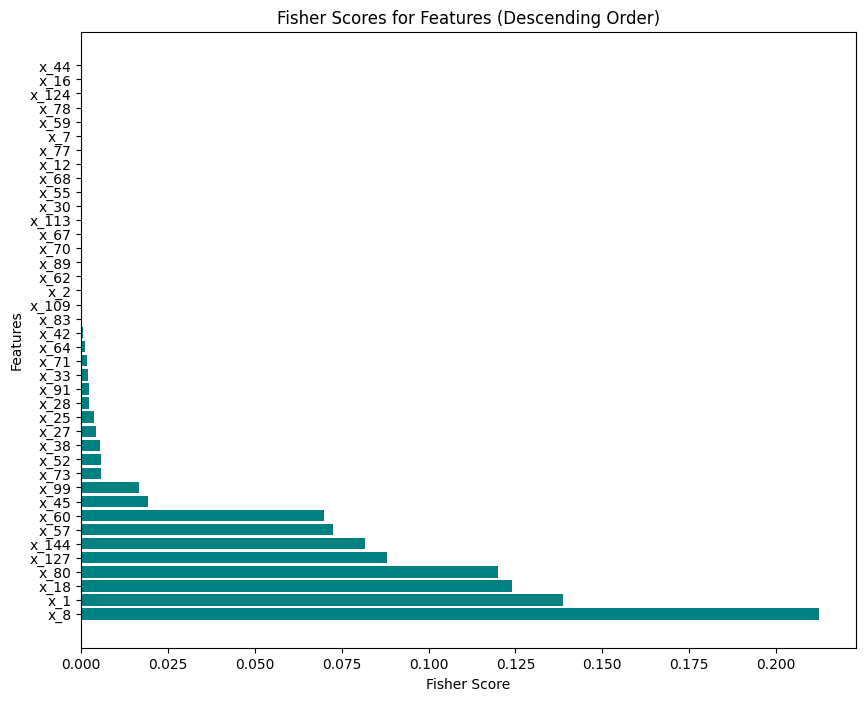

Fisher Scores (Descending Order):
   Feature  Fisher Score
34     x_8      0.212411
0      x_1      0.138784
8     x_18      0.123888
35    x_80      0.119924
5    x_127      0.088121
6    x_144      0.081610
21    x_57      0.072373
23    x_60      0.069954
18    x_45      0.019242
39    x_99      0.016655
31    x_73      0.005875
19    x_52      0.005824
15    x_38      0.005383
11    x_27      0.004404
10    x_25      0.003658
12    x_28      0.002426
38    x_91      0.002410
14    x_33      0.001993
30    x_71      0.001811
25    x_64      0.001104
16    x_42      0.000512
36    x_83      0.000420
1    x_109      0.000414
9      x_2      0.000344
24    x_62      0.000300
37    x_89      0.000271
29    x_70      0.000260
26    x_67      0.000236
2    x_113      0.000224
13    x_30      0.000183
20    x_55      0.000151
27    x_68      0.000124
3     x_12      0.000086
32    x_77      0.000067
28     x_7      0.000035
22    x_59      0.000019
33    x_78      0.000012
4    x_124      

In [34]:
plt.figure(figsize=(10, 8))
plt.barh(feat_importances['Feature'], feat_importances['Fisher Score'], color='teal')
plt.title('Fisher Scores for Features (Descending Order)')
plt.xlabel('Fisher Score')
plt.ylabel('Features')
plt.show()

print("Fisher Scores (Descending Order):")
print(feat_importances)

In [35]:
feat_importances.head(20)

,Feature,Fisher Score
34,x_8,0.212411
0,x_1,0.138784
8,x_18,0.123888
35,x_80,0.119924
5,x_127,0.088121
6,x_144,0.081610
21,x_57,0.072373
23,x_60,0.069954
18,x_45,0.019242
39,x_99,0.016655


In [36]:
selected_features=feat_importances['Feature'].head(20)
selected_features=np.array(selected_features.values)

In [37]:
X=data[selected_features]

In [38]:

model_fisher = LogisticRegression()
model_fisher.fit(X_train, y_train)
y_pred = model_fisher.predict(X_test)
accuracy_fisher = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_fisher)

Accuracy: 0.9101941747572816


In [39]:
final_selected_variables=rfc_selected_features

In [ ]:

column_headings = df.columns.tolist()

trimmed_column_headings = column_headings[1:-1]

result_df = pd.DataFrame({'Variables': trimmed_column_headings})

result_df['Mark'] = result_df['Variables'].isin(final_selected_variables).astype(int)

result_df.to_csv('VARUN_IITKHARAGPUR_VAR.csv', index=False)

print("File saved as 'VARUN_IITKHARAGPUR_VAR.csv'")